In [1]:
#Libraries Required
import pandas as pd
import datetime
import matplotlib as mplt
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np 
import math as mt
from datetime import timedelta
import ensemble
from scipy import stats

In [2]:
#Given Data

# National Amount per Certificate
N = 100000

# Weightage
W = 0.2

Basket_initial = 1

#Given Shares Data, along with their share prices
data = {'BMW'    : [73.69, 73.32, 50.85, 74.15, 84.69, 93.2],
        'Diageo' : [2810 , 3114, 2842.5, 2952, 3402.5, 3878],
        'Nestle' : [83.5 , 104.3, 104.92, 103.68, 110.44, 122.76],
        'Nike' : [71.12 , 93.05, 92.95, 132.98, 133.27, 174.88],
        'Visa' : [133.37 , 181.66, 193.86, 203.88, 226.44, 200.86]
}

#Converting Dates String into Date format
Date = [datetime.date(2019,11,27), datetime.date(2019,11,27), datetime.date(2020,5,27), datetime.date(2020,11,27), datetime.date(2021,5,27), datetime.date(2021,11,26)]


In [3]:
#Variable Initialization
Share_performace = []
Basket = []
Redeemed = []
testredemeed = []
Underlying_shares = ""
Redemption_Date = ""
Redeemed_Amount = 0

In [4]:
#Defining the dataframe
df = pd.DataFrame(data)

#Performance Share Calculation, Basket Calculation
for i in range(1, 6):

    Share_initail = df.iloc[0][i-1]
    Share_final = df.iloc[-1][i-1]
    #Share performance = ((SHAREf / SHAREi)-1)*100
    Share_performace.append(((Share_final/Share_initail)-1)*100)
    Basket.append((Share_final/Share_initail) * W)

The Worst Performing Share is : BMW
And WO Share initial is : 73.69
And WO Share final is : 93.2


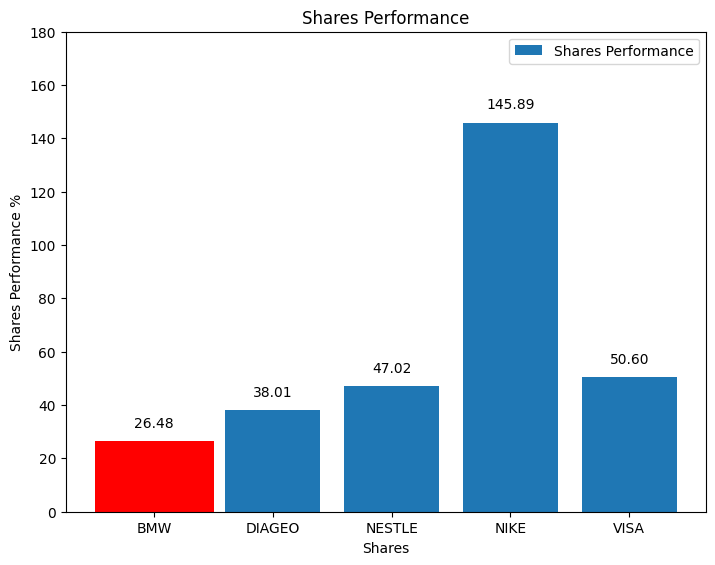

In [93]:
#Calculating basket, shares initial, final and performance
Share_min = min(Share_performace)
Share_min_index = Share_performace.index(Share_min)
WO_Share_initial = df.iloc[0][Share_min_index]
WO_Share_final = df.iloc[-1][Share_min_index]
Basket_final = sum(Basket)

#Printing the variables
print(f"The Worst Performing Share is : {df.columns[Share_min_index]}")
print(f"And WO Share initial is : {WO_Share_initial}")
print(f"And WO Share final is : {WO_Share_final}")

#Defining Labels for Chart x-axis
x_axis = ['BMW','DIAGEO','NESTLE','NIKE','VISA']
#Chart Element Width
width = 1
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Populating Chart with values
ax.bar(x_axis,Share_performace)

#Populating Chart with worst performing share, adding RED COLOR
ax.bar(df.columns[Share_min_index],Share_performace[Share_min_index],width,color='r')

# Title and Labels
ax.set_ylabel('Shares Performance %')
ax.set_xlabel('Shares')
ax.set_title('Shares Performance')
ax.set_ylim([0, 180])

#Data Labels
for x,y in zip(x_axis,Share_performace):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

#Adding Legend to Chart
ax.legend(labels=['Shares Performance'])
plt.show()

In [89]:
#Calculating Redeem Amounts

#As per given conditions from under-lying shares, calcualting redemption amounts agaisnt early redemption dates
for i in range(1, 6):

    for n in range(1, 5):
        
        if df.iloc[n][i-1] >= (0.85 * df.iloc[0][i-1]):
            Underlying_shares = df.columns[i-1]
            Redemption_Date = Date[n]
            Redeemed_Amount = N * (1.0525 + n*0.0525)
        
        elif WO_Share_final >= (0.85 * WO_Share_initial):
            Underlying_shares = df.columns[i-1]
            Redemption_Date = Date[-1]
            Redeemed_Amount = N * 1.315
            
        elif Basket_final > (0.85 * Basket_initial):
            Underlying_shares = df.columns[i-1]
            Redemption_Date = Date[-1]
            Redeemed_Amount = N * 1.00
            
        else:
            Underlying_shares = df.columns[i-1]
            Redemption_Date = Date[-1]
            Redeemed_Amount = N * ( 1.00 + (WO_Share_final - 0.85 * WO_Share_initial)/WO_Share_initial)
            
        Redeemed.append({'Underlying Shares' : Underlying_shares, 'Redemption Date' : Redemption_Date, 'Redeemed Amount' : Redeemed_Amount})
    Amount_df = pd.DataFrame(Redeemed)
    
    print(Amount_df.pivot_table(index=['Underlying Shares','Redemption Date'],values=['Redeemed Amount']).stack())

Underlying Shares  Redemption Date                 
                                    Redeemed Amount    113125.000000
BMW                2019-11-27       Redeemed Amount    110500.000000
                   2020-11-27       Redeemed Amount    121000.000000
                   2021-05-27       Redeemed Amount    126250.000000
                   2021-11-26       Redeemed Amount    131500.000000
                                    Redeemed Amount    119541.666667
Diageo             2019-11-27       Redeemed Amount    110500.000000
                   2020-05-27       Redeemed Amount    115750.000000
                   2020-11-27       Redeemed Amount    121000.000000
                   2021-05-27       Redeemed Amount    126250.000000
Nestle             2019-11-27       Redeemed Amount    110500.000000
                   2020-05-27       Redeemed Amount    115750.000000
                   2020-11-27       Redeemed Amount    121000.000000
                   2021-05-27       Redeemed Amount

In [94]:
# Defining TIME in YEARS (Difference between each early redemption date to share issue date)
T = [1,1.5,2,2.5,3]

# Sample Size for DATES
sample =5

# Standard Devation of TIME (Observations)
std= np.std(T)

# Mean of TIME (Observations)
mean = np.mean(T)

# Calculating Normal Distribition with MEAN and STANDARD DEVIATION
snd= stats.norm(mean,std)

# Generating Samples with MINIMUM and MAXIMUM of our OBSERVATION, along with number of samples we require for MONTE CARLO SIMULATION
# linespace (lower bound, upper bound, MONTE_CARLO steps)
x = np.linspace(min(T), max(T), 9747)

#CONFIDENCE INTERVAL CALUCATION (Mean +- Confidence Value (95%) * (Standard Devation/sqrt(Sample)))
CI_Lower = mean - 0.95*(std/(np.sqrt(sample)))
CI_Upper = mean + 0.95*(std/(np.sqrt(sample))) 

#Generating Plots for Probability Density Function
width = 0.01
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x, snd.pdf(x), width, color='b')
ax.bar(CI_Lower, snd.pdf(x), width, color='r')
ax.bar(CI_Upper, snd.pdf(x), width, color='r')
ax.set_ylabel('Probability')
ax.set_xlabel('Redemption Years')
ax.set_title('Probability by Years of Redemption')
ax.axes.autoscale
ax.legend(labels=['Probability'])
plt.show()